In [1]:
##Parte 1
# Bibliotecas principais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualização bonita nos gráficos
sns.set(style="whitegrid")



In [2]:
import os
os.getcwd()


'C:\\Users\\leona\\Downloads'

In [3]:
# Carregando o dataset macro (abandono e renda média)
df_ab = pd.read_csv('AbandonoEscolar_RendaMedia_2013_2023.csv')

# Carregando o censo escolar
df_censo = pd.read_csv('microdados_ed_basica_2022.csv', sep=';', encoding='latin1')



C:\Users\leona\AppData\Local\Temp\ipykernel_6024\2028376172.py:5: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_censo = pd.read_csv('microdados_ed_basica_2022.csv', sep=';', encoding='latin1')


In [4]:
# Ver os 5 primeiros registros do dataset do censo
df_censo.head()


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,CO_MESORREGIAO,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
0,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,0.0,0.0,0.0,0.0,10.0,6.0,4.0,3.0,3.0,0.0
2,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0


In [5]:
#Visualizar as colunas disponíveis
df_censo.columns


Index(['NU_ANO_CENSO', 'NO_REGIAO', 'CO_REGIAO', 'NO_UF', 'SG_UF', 'CO_UF',
       'NO_MUNICIPIO', 'CO_MUNICIPIO', 'NO_MESORREGIAO', 'CO_MESORREGIAO',
       ...
       'QT_TUR_FUND_AF', 'QT_TUR_MED', 'QT_TUR_PROF', 'QT_TUR_PROF_TEC',
       'QT_TUR_EJA', 'QT_TUR_EJA_FUND', 'QT_TUR_EJA_MED', 'QT_TUR_ESP',
       'QT_TUR_ESP_CC', 'QT_TUR_ESP_CE'],
      dtype='object', length=385)

In [6]:
#Amostra aleatória
df_censo.sample(5)


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,CO_MESORREGIAO,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
94372,2022,Nordeste,2,Bahia,BA,29,Iuiu,2917334,Centro Sul Baiano,6,...,16.0,0.0,0.0,0.0,3.0,3.0,0.0,9.0,9.0,0.0
26430,2022,Nordeste,2,Maranhão,MA,21,Alto Alegre do Pindaré,2100477,Oeste Maranhense,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172502,2022,Sudeste,3,São Paulo,SP,35,São Paulo,3550308,Metropolitana de São Paulo,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94084,2022,Nordeste,2,Bahia,BA,29,Itapitanga,2916609,Sul Baiano,7,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0,0.0
75335,2022,Nordeste,2,Pernambuco,PE,26,Quipapá,2611507,Mata Pernambucana,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Mostra o número de colunas, tipo de dado e se tem valores ausentes
df_censo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224649 entries, 0 to 224648
Columns: 385 entries, NU_ANO_CENSO to QT_TUR_ESP_CE
dtypes: float64(358), int64(11), object(16)
memory usage: 659.9+ MB


In [8]:
#Verifica se há muitos dados faltando
df_censo.isna().sum()


NU_ANO_CENSO           0
NO_REGIAO              0
CO_REGIAO              0
NO_UF                  0
SG_UF                  0
                   ...  
QT_TUR_EJA_FUND    46303
QT_TUR_EJA_MED     46303
QT_TUR_ESP         46303
QT_TUR_ESP_CC      46303
QT_TUR_ESP_CE      46303
Length: 385, dtype: int64

In [9]:
#Obtendo todas as colunas do DataSet
df_censo.columns.tolist()

['NU_ANO_CENSO',
 'NO_REGIAO',
 'CO_REGIAO',
 'NO_UF',
 'SG_UF',
 'CO_UF',
 'NO_MUNICIPIO',
 'CO_MUNICIPIO',
 'NO_MESORREGIAO',
 'CO_MESORREGIAO',
 'NO_MICRORREGIAO',
 'CO_MICRORREGIAO',
 'CO_DISTRITO',
 'NO_ENTIDADE',
 'CO_ENTIDADE',
 'TP_DEPENDENCIA',
 'TP_CATEGORIA_ESCOLA_PRIVADA',
 'TP_LOCALIZACAO',
 'TP_LOCALIZACAO_DIFERENCIADA',
 'DS_ENDERECO',
 'NU_ENDERECO',
 'DS_COMPLEMENTO',
 'NO_BAIRRO',
 'CO_CEP',
 'NU_DDD',
 'NU_TELEFONE',
 'TP_SITUACAO_FUNCIONAMENTO',
 'CO_ORGAO_REGIONAL',
 'DT_ANO_LETIVO_INICIO',
 'DT_ANO_LETIVO_TERMINO',
 'IN_VINCULO_SECRETARIA_EDUCACAO',
 'IN_VINCULO_SEGURANCA_PUBLICA',
 'IN_VINCULO_SECRETARIA_SAUDE',
 'IN_VINCULO_OUTRO_ORGAO',
 'IN_PODER_PUBLICO_PARCERIA',
 'TP_PODER_PUBLICO_PARCERIA',
 'IN_CONVENIADA_PP',
 'TP_CONVENIO_PODER_PUBLICO',
 'IN_FORMA_CONT_TERMO_COLABORA',
 'IN_FORMA_CONT_TERMO_FOMENTO',
 'IN_FORMA_CONT_ACORDO_COOP',
 'IN_FORMA_CONT_PRESTACAO_SERV',
 'IN_FORMA_CONT_COOP_TEC_FIN',
 'IN_FORMA_CONT_CONSORCIO_PUB',
 'IN_TIPO_ATEND_ESCOLARIZACA

In [10]:
##Parte 2
# Selecionando colunas relevantes
colunas_interesse = [
    'NU_ANO_CENSO',     # Ano do censo
    'SG_UF',            # Sigla do estado (ex: SP, RJ)
    'CO_UF',            # Código do estado
    'QT_MAT_BAS'        # Total de matrículas da educação básica
]

df_censo_filtrado = df_censo[colunas_interesse].copy()


In [11]:
#Agrupando por estado e Ano
df_censo_agregado = df_censo_filtrado.groupby(['NU_ANO_CENSO', 'SG_UF']).agg({
    'QT_MAT_BAS': 'sum'
}).reset_index()

df_censo_agregado.rename(columns={
    'NU_ANO_CENSO': 'Ano',
    'SG_UF': 'UF',
    'QT_MAT_BAS': 'Total_Matriculas'
}, inplace=True)

df_censo_agregado.head()


,Ano,UF,Total_Matriculas
0,2022,AC,254695.0
1,2022,AL,884262.0
2,2022,AM,1148756.0
3,2022,AP,209101.0
4,2022,BA,3444550.0


In [12]:
df_ab.columns.tolist()


['Ano',
 'Unidade_Geografica',
 'Regiao',
 'Localizacao',
 'Dependencia_Administrativa',
 'Grupo_de_Abandono',
 'Taxa_Abandono',
 'Renda_Media']

In [13]:
df_ab = df_ab[df_ab['Ano'] == 2022]


In [14]:
df_ab['UF'] = df_ab['Unidade_Geografica'].astype(str).str.strip().str.title()

In [15]:
# Mostrar os valores originais da coluna UF, com contagem
print("Valores únicos antes do mapeamento:")
print(df_ab['UF'].value_counts(dropna=False))


Valores únicos antes do mapeamento:
Brasil                 252
Norte                  252
Goiás                  252
Mato Grosso            252
Mato Grosso Do Sul     252
Rio Grande Do Sul      252
Santa Catarina         252
Paraná                 252
Rio De Janeiro         252
Espírito Santo         252
Minas Gerais           252
Bahia                  252
Sergipe                252
Pernambuco             252
Paraíba                252
Rio Grande Do Norte    252
Ceará                  252
Piauí                  252
Nordeste               252
Sudeste                252
Sul                    252
Centro-Oeste           252
Rondônia               252
Amazonas               252
Roraima                252
Pará                   252
Tocantins              252
Maranhão               252
São Paulo              238
Amapá                  238
Alagoas                238
Acre                   224
Distrito Federal       210
Name: UF, dtype: int64


In [16]:
#criar um dicionário de mapeamento:
# Mapeamento de nome para sigla
mapa_ufs = {
    'Rondônia': 'RO', 'Acre': 'AC', 'Amazonas': 'AM', 'Roraima': 'RR',
    'Pará': 'PA', 'Amapá': 'AP', 'Tocantins': 'TO',
    'Maranhão': 'MA', 'Piauí': 'PI', 'Ceará': 'CE', 'Rio Grande do Norte': 'RN',
    'Paraíba': 'PB', 'Pernambuco': 'PE', 'Alagoas': 'AL', 'Sergipe': 'SE', 'Bahia': 'BA',
    'Minas Gerais': 'MG', 'Espírito Santo': 'ES', 'Rio de Janeiro': 'RJ', 'São Paulo': 'SP',
    'Paraná': 'PR', 'Santa Catarina': 'SC', 'Rio Grande do Sul': 'RS',
    'Mato Grosso do Sul': 'MS', 'Mato Grosso': 'MT', 'Goiás': 'GO', 'Distrito Federal': 'DF'
}

# Corrigir nome dos estados para formato padrão antes do mapeamento
df_ab['UF'] = df_ab['UF'].str.strip().str.title()  # tira espaços e padroniza caixa

# Aplicar o dicionário
df_ab['UF'] = df_ab['UF'].map(mapa_ufs)

# Remover NaN resultantes de valores não mapeados
df_ab = df_ab.dropna(subset=['UF'])

print(df_ab['UF'].unique())
print(df_ab.shape)




['RO' 'AC' 'AM' 'RR' 'PA' 'AP' 'TO' 'MA' 'PI' 'CE' 'PB' 'PE' 'AL' 'SE'
 'BA' 'MG' 'ES' 'SP' 'PR' 'SC' 'MT' 'GO' 'DF']
(5684, 9)


In [17]:
df_ab.rename(columns={
    'Unidade_Geografica': 'UF',
    'Taxa_Abandono': 'Taxa de Abandono',
    'Renda_Media': 'Renda Média'
}, inplace=True)



In [18]:
print(df_ab.columns[df_ab.columns.duplicated()])
df_ab = df_ab.loc[:, ~df_ab.columns.duplicated()]



Index(['UF'], dtype='object')


In [19]:
df_final = pd.merge(df_ab, df_censo_agregado, on=['Ano', 'UF'], how='left')
df_final.head()



,Ano,UF,Regiao,Localizacao,Dependencia_Administrativa,Grupo_de_Abandono,Taxa de Abandono,Renda Média,Total_Matriculas
0,2022,Rondônia,Norte,Total,Total,Ensino Fundamental,1.1,2443,NaN
1,2022,Rondônia,Norte,Urbana,Total,Ensino Fundamental,1.0,2443,NaN
2,2022,Rondônia,Norte,Rural,Total,Ensino Fundamental,1.3,2443,NaN
3,2022,Rondônia,Norte,Total,Federal,Ensino Fundamental,NaN,2443,NaN
4,2022,Rondônia,Norte,Urbana,Federal,Ensino Fundamental,NaN,2443,NaN


In [20]:
df_final[['UF', 'Ano', 'Taxa de Abandono', 'Renda Média', 'Total_Matriculas']].head(10)


,UF,Ano,Taxa de Abandono,Renda Média,Total_Matriculas
0,Rondônia,2022,1.1,2443,NaN
1,Rondônia,2022,1.0,2443,NaN
2,Rondônia,2022,1.3,2443,NaN
3,Rondônia,2022,NaN,2443,NaN
4,Rondônia,2022,NaN,2443,NaN
5,Rondônia,2022,NaN,2443,NaN
6,Rondônia,2022,2.0,2443,NaN
7,Rondônia,2022,1.8,2443,NaN
8,Rondônia,2022,3.8,2443,NaN
9,Rondônia,2022,0.4,2443,NaN


In [21]:
df_final['Total_Matriculas'].isna().sum()


5684

In [22]:
print("UF no df_ab:")
print(df_ab['UF'].unique())

print("\nUF no df_censo_agregado:")
print(df_censo_agregado['UF'].unique())


UF no df_ab:
['Rondônia' 'Acre' 'Amazonas' 'Roraima' 'Pará' 'Amapá' 'Tocantins'
 'Maranhão' 'Piauí' 'Ceará' 'Paraíba' 'Pernambuco' 'Alagoas' 'Sergipe'
 'Bahia' 'Minas Gerais' 'Espírito Santo' 'São Paulo' 'Paraná'
 'Santa Catarina' 'Mato Grosso' 'Goiás' 'Distrito Federal']

UF no df_censo_agregado:
['AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MS' 'MT' 'PA'
 'PB' 'PE' 'PI' 'PR' 'RJ' 'RN' 'RO' 'RR' 'RS' 'SC' 'SE' 'SP' 'TO']


In [23]:
# Recarregar o dataset do abandono + renda
df_ab = pd.read_csv('AbandonoEscolar_RendaMedia_2013_2023.csv')

# Filtrar apenas o ano de 2022
df_ab = df_ab[df_ab['Ano'] == 2022].copy()

# Visualizar os valores originais da coluna
print("Valores únicos de 'Unidade_Geografica':")
print(df_ab['Unidade_Geografica'].unique())

# Padronizar a coluna de estados
df_ab['UF'] = df_ab['Unidade_Geografica'].astype(str).str.strip().str.title()

# Dicionário para mapear nome → sigla
mapa_ufs = {
    'Rondônia': 'RO', 'Acre': 'AC', 'Amazonas': 'AM', 'Roraima': 'RR',
    'Pará': 'PA', 'Amapá': 'AP', 'Tocantins': 'TO',
    'Maranhão': 'MA', 'Piauí': 'PI', 'Ceará': 'CE', 'Rio Grande do Norte': 'RN',
    'Paraíba': 'PB', 'Pernambuco': 'PE', 'Alagoas': 'AL', 'Sergipe': 'SE', 'Bahia': 'BA',
    'Minas Gerais': 'MG', 'Espírito Santo': 'ES', 'Rio de Janeiro': 'RJ', 'São Paulo': 'SP',
    'Paraná': 'PR', 'Santa Catarina': 'SC', 'Rio Grande do Sul': 'RS',
    'Mato Grosso do Sul': 'MS', 'Mato Grosso': 'MT', 'Goiás': 'GO', 'Distrito Federal': 'DF'
}

# Aplicar o mapeamento
df_ab['UF'] = df_ab['UF'].map(mapa_ufs)

# Remover linhas que não são estados (viraram NaN)
df_ab = df_ab.dropna(subset=['UF'])

# Renomear colunas finais
df_ab.rename(columns={
    'Taxa_Abandono': 'Taxa de Abandono',
    'Renda_Media': 'Renda Média'
}, inplace=True)

# Verificar resultado antes do merge
print("UFs finais disponíveis:")
print(df_ab['UF'].unique())
print("Ano mínimo e máximo:", df_ab['Ano'].min(), "-", df_ab['Ano'].max())

# Fazer o merge com df_censo_agregado
df_final = pd.merge(df_ab, df_censo_agregado, on=['Ano', 'UF'], how='left')

# Exibir resultado
df_final[['UF', 'Ano', 'Taxa de Abandono', 'Renda Média', 'Total_Matriculas']].head(10)


Valores únicos de 'Unidade_Geografica':
['Brasil' 'Norte' 'Nordeste' 'Sudeste' 'Sul' 'Centro-Oeste' 'Rondônia'
 'Acre' 'Amazonas' 'Roraima' 'Pará' 'Amapá' 'Tocantins' 'Maranhão' 'Piauí'
 'Ceará' 'Rio Grande do Norte' 'Paraíba' 'Pernambuco' 'Alagoas' 'Sergipe'
 'Bahia' 'Minas Gerais' 'Espírito Santo' 'Rio de Janeiro' 'São Paulo'
 'Paraná' 'Santa Catarina' 'Rio Grande do Sul' 'Mato Grosso do Sul'
 'Mato Grosso' 'Goiás' 'Distrito Federal']
UFs finais disponíveis:
['RO' 'AC' 'AM' 'RR' 'PA' 'AP' 'TO' 'MA' 'PI' 'CE' 'PB' 'PE' 'AL' 'SE'
 'BA' 'MG' 'ES' 'SP' 'PR' 'SC' 'MT' 'GO' 'DF']
Ano mínimo e máximo: 2022 - 2022


,UF,Ano,Taxa de Abandono,Renda Média,Total_Matriculas
0,RO,2022,1.1,2443,391467.0
1,RO,2022,1.0,2443,391467.0
2,RO,2022,1.3,2443,391467.0
3,RO,2022,NaN,2443,391467.0
4,RO,2022,NaN,2443,391467.0
5,RO,2022,NaN,2443,391467.0
6,RO,2022,2.0,2443,391467.0
7,RO,2022,1.8,2443,391467.0
8,RO,2022,3.8,2443,391467.0
9,RO,2022,0.4,2443,391467.0


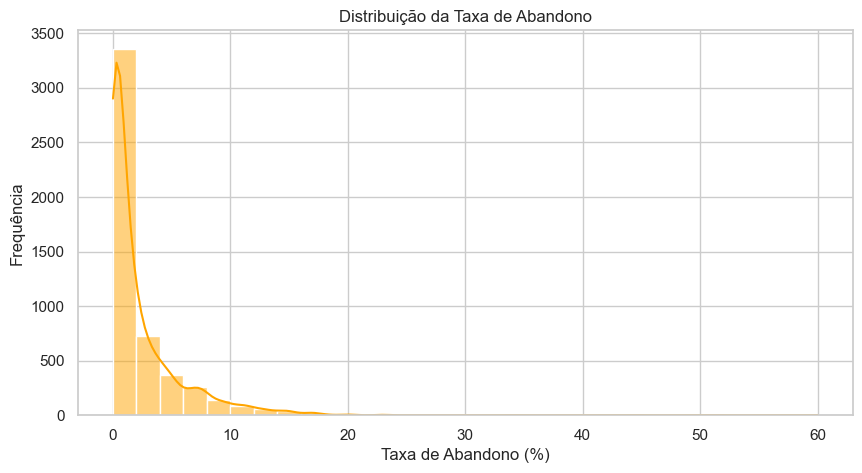

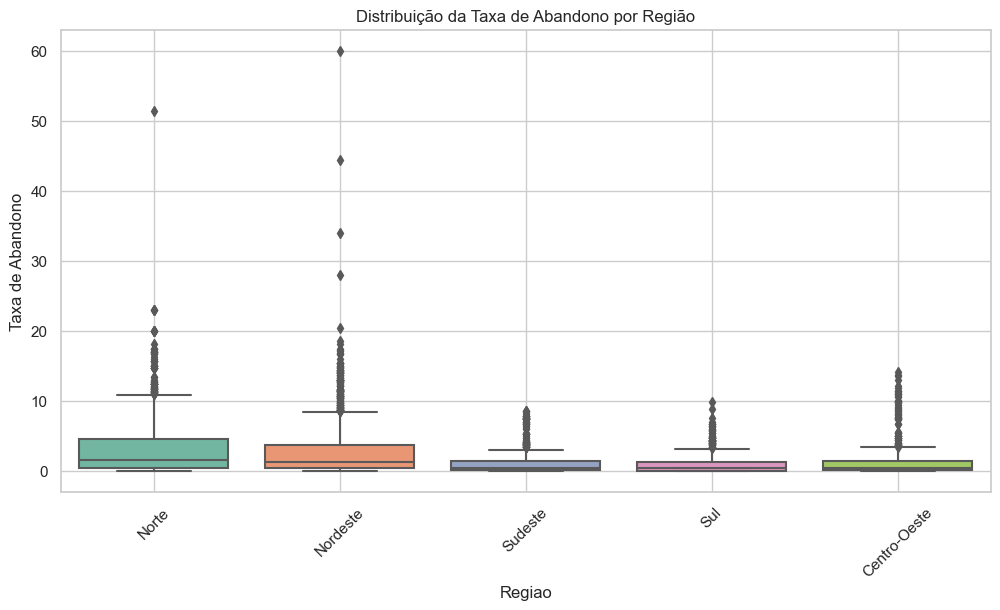

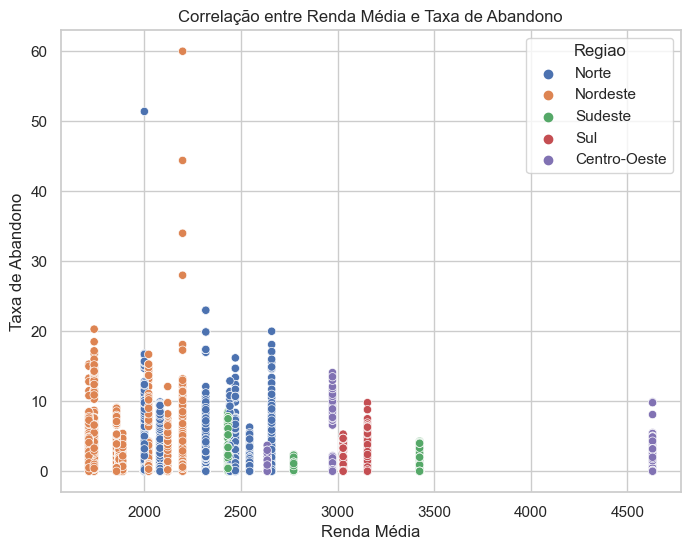

In [24]:
# Etapa 3: Análise Exploratória de Dados (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar a distribuição da Taxa de Abandono
plt.figure(figsize=(10, 5))
sns.histplot(df_ab['Taxa de Abandono'], kde=True, bins=30, color='orange')
plt.title('Distribuição da Taxa de Abandono')
plt.xlabel('Taxa de Abandono (%)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Taxa de abandono por região
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_ab, x='Regiao', y='Taxa de Abandono', palette='Set2')
plt.title('Distribuição da Taxa de Abandono por Região')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Correlação com Renda Média
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_ab, x='Renda Média', y='Taxa de Abandono', hue='Regiao')
plt.title('Correlação entre Renda Média e Taxa de Abandono')
plt.grid(True)
plt.show()


In [25]:
# Etapa 4: Pré-processamento dos Dados para Modelagem

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecionar colunas de interesse como variáveis explicativas (features)
colunas_entrada = [
    'Renda Média',
    'Total_Matriculas',
    'Localizacao',
    'Dependencia_Administrativa'
]

# Criar um novo DataFrame apenas com linhas completas
df_model = df_final[colunas_entrada + ['Taxa de Abandono']].dropna()

# Converter variáveis categóricas em dummies
df_model = pd.get_dummies(df_model, columns=['Localizacao', 'Dependencia_Administrativa'], drop_first=True)

# Separar X e y
X = df_model.drop('Taxa de Abandono', axis=1)
y = df_model['Taxa de Abandono']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronização das features (opcional, útil para alguns modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Pré-processamento concluído. Pronto para modelagem!")


Pré-processamento concluído. Pronto para modelagem!


In [26]:

# === Etapa de Modelagem ===
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Treinando modelo de Regressão Linear
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Treinando modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Função de avaliação
def avaliar_modelo(nome, y_test, y_pred):
    print(f"\nModelo: {nome}")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R²:", r2_score(y_test, y_pred))

# Avaliação dos modelos
avaliar_modelo("Regressão Linear", y_test, y_pred_lr)
avaliar_modelo("Random Forest", y_test, y_pred_rf)



Modelo: Regressão Linear
MAE: 2.16914028608641
RMSE: 4.038856849813214
R²: 0.07911111168903695

Modelo: Random Forest
MAE: 1.9510904831145968
RMSE: 3.7030143593113873
R²: 0.22589280568037207


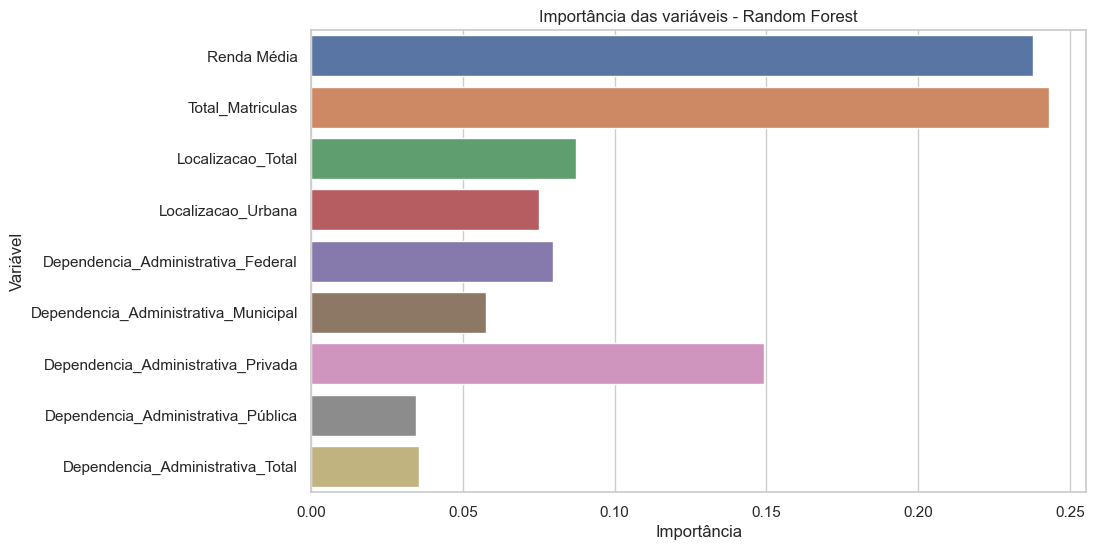

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = rf_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Importância das variáveis - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Comparar valores reais e previstos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.xlabel('Taxa de Abandono Real')
plt.ylabel('Taxa de Abandono Prevista')
plt.title('Comparação entre valores reais e previstos (Regressão Linear)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Linha de referência
plt.grid(True)
plt.show()
